# <div class="alert alert-block alert-info"> <span style="font-family: Times New Roman">Descriptive Statistics Assignment </span> </div>

###### Note: 
<div class="alert alert-block alert-danger"> <span style="font-family: Times New Roman"> 
    - Kindly use this notebook to solve the programming problems. <br>
    - Submit assignments with .ipynb file extension.<br>
- Kindly write down the explanations/insights for the graphs.<br>
- Kindly use comments or markdowns to explain logic behind the codes, approach to solve the problem.</span></div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
</p>
<p style='margin-left:1em;'>
<b>The below-given data is of two batsmen from which the captain has to select one batsman. As a captain, I need a batsman whose performance is stable in England. A test series is happening in England during winter. Use Descriptive statistics to select one batsman who can probably perform better than the other. Please give proper reasoning behind your selection, like why you have chosen the particular batsman supported by statistic outputs. You have to show your numerical findings with the help of Python code, and a theoretical interpretation also is given to support your conclusion. 
    </b></p>
    
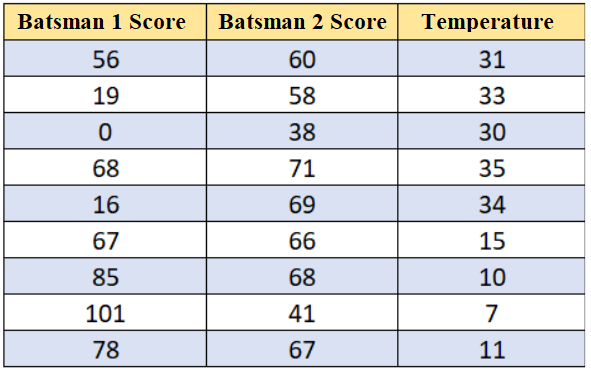

</span>
</div>



##  <mark><span  style= "font-family: Times New Roman">Import necessary libraries</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

##  <mark><span  style= "font-family: Times New Roman">View the data</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [36]:
Batsman_1_score = [56, 19, 0, 68, 16, 67, 85, 101, 78]
Batsman_2_score = [60, 58, 38, 71, 69, 66, 68, 41, 67]
Temperature = [31, 33, 30, 35, 34, 15, 10, 7, 11]
data = pd.DataFrame({'Batsman_1_score': Batsman_1_score, 'Batsman_2_score': Batsman_2_score, 'Temperature': Temperature})
data

,Batsman_1_score,Batsman_2_score,Temperature
0,56,60,31
1,19,58,33
2,0,38,30
3,68,71,35
4,16,69,34
5,67,66,15
6,85,68,10
7,101,41,7
8,78,67,11



##  <mark><span  style= "font-family: Times New Roman">Data preprocessing</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
</p>
<p style='margin-left:1em;'>
</p><br>
   
  1. Third match score of Batsman-1 was mistakenly noted as 0. Kindly replace the value with the mean of earlier matches as it is not known.Round the calculated mean to the nearest integer. <br>    

2. Create a new feature in the dataframe naming 'weather' <br>
    
   a. Column should have 'Warm' if the temperature on the match day is greater than the mean of the temperatures.  <br>
   b. Column should have 'Cool' if the temperature on the match day is lesser than the mean of the temperatures.  <br>
</span>
</div>


In [37]:
#1 Data Preprocessing
df = pd.DataFrame({
    'Batsman_1_score': Batsman_1_score,
    'Batsman_2_score': Batsman_2_score,
    'Temperature': Temperature
})
# Correct Batsman_1's third match score
df.at[2, 'Batsman_1_score'] = round(np.mean(df['Batsman_1_score'][:2]))

In [38]:
#2 Create 'weather' column
mean_temperature = np.mean(df['Temperature'])
df['weather'] = np.where(df['Temperature'] > mean_temperature, 'Warm', 'Cool')

In [39]:
# Descriptive Statistics
stats_batsman_1 = df['Batsman_1_score'].describe()
stats_batsman_2 = df['Batsman_2_score'].describe()

# Calculate IQR for Batsman-1 and Batsman-2
iqr_batsman_1 = np.percentile(df['Batsman_1_score'], 75) - np.percentile(df['Batsman_1_score'], 25)
iqr_batsman_2 = np.percentile(df['Batsman_2_score'], 75) - np.percentile(df['Batsman_2_score'], 25)

# Identify potential outliers using IQR
outliers_batsman_1 = df[(df['Batsman_1_score'] < np.percentile(df['Batsman_1_score'], 25) - 1.5 * iqr_batsman_1) |
                        (df['Batsman_1_score'] > np.percentile(df['Batsman_1_score'], 75) + 1.5 * iqr_batsman_1)]

outliers_batsman_2 = df[(df['Batsman_2_score'] < np.percentile(df['Batsman_2_score'], 25) - 1.5 * iqr_batsman_2) |
                        (df['Batsman_2_score'] > np.percentile(df['Batsman_2_score'], 75) + 1.5 * iqr_batsman_2)]
# Display the preprocessed data
print("Preprocessed Data:")
print(df)

Preprocessed Data:
   Batsman_1_score  Batsman_2_score  Temperature weather
0               56               60           31    Warm
1               19               58           33    Warm
2               38               38           30    Warm
3               68               71           35    Warm
4               16               69           34    Warm
5               67               66           15    Cool
6               85               68           10    Cool
7              101               41            7    Cool
8               78               67           11    Cool


In [40]:
# Display Descriptive Statistics
print("\nBatsman 1 Stats:")
print(stats_batsman_1)
print("\nBatsman 2 Stats:")
print(stats_batsman_2)

# Display IQR and potential outliers
print(f"\nIQR for Batsman 1: {iqr_batsman_1}")
print(f"IQR for Batsman 2: {iqr_batsman_2}")
print("\nPotential Outliers for Batsman 1:")
print(outliers_batsman_1)
print("\nPotential Outliers for Batsman 2:")
print(outliers_batsman_2)


Batsman 1 Stats:
count      9.000000
mean      58.666667
std       29.248932
min       16.000000
25%       38.000000
50%       67.000000
75%       78.000000
max      101.000000
Name: Batsman_1_score, dtype: float64

Batsman 2 Stats:
count     9.000000
mean     59.777778
std      12.245180
min      38.000000
25%      58.000000
50%      66.000000
75%      68.000000
max      71.000000
Name: Batsman_2_score, dtype: float64

IQR for Batsman 1: 40.0
IQR for Batsman 2: 10.0

Potential Outliers for Batsman 1:
Empty DataFrame
Columns: [Batsman_1_score, Batsman_2_score, Temperature, weather]
Index: []

Potential Outliers for Batsman 2:
   Batsman_1_score  Batsman_2_score  Temperature weather
2               38               38           30    Warm
7              101               41            7    Cool


##  <mark><span  style= "font-family: Times New Roman">Perform EDA</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

### Visualize the evidences 

In [41]:
#  Boxplot
#   > Experience a visual representation of Batsman 1 and Batsman 2's scoring patterns with this captivating boxplot.
#   > Delve into their performance through the depiction of the median, interquartile range, and possible outliers.
#   > Venture into the examination of the distribution and average of scores for each individual player.

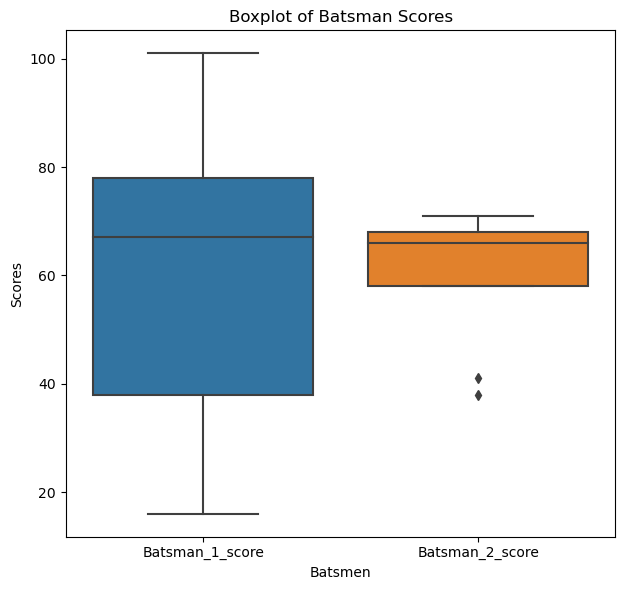

In [42]:
# EDA Visualizations
# Boxplot of Batsman scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['Batsman_1_score', 'Batsman_2_score']])
plt.title('Boxplot of Batsman Scores')
plt.xlabel('Batsmen')
plt.ylabel('Scores')
plt.tight_layout()
plt.show()

In [43]:
#   > The Count Plot of Weather Conditions reveals the proportion of warm and cool weather conditions that occurred during the matches, providing valuable insights into the series.
#   > It allows us to visualize the frequency of various weather conditions, giving us an idea of how they may have impacted the performance of the batsmen.

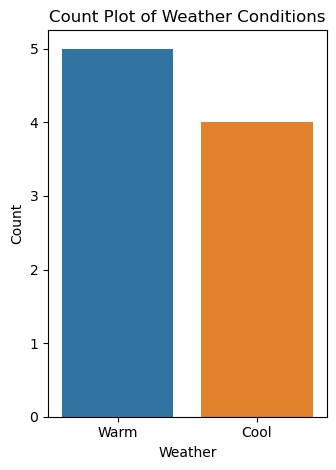

In [44]:
# Count plot of Weather conditions
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='weather')
plt.title('Count Plot of Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

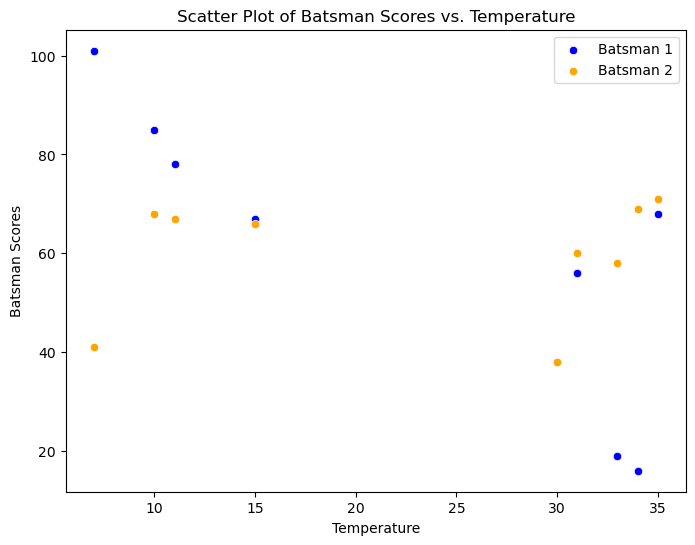

In [45]:
# Scatter plot of Batsman scores vs. Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Batsman_1_score', data=df, label='Batsman 1', color='blue')
sns.scatterplot(x='Temperature', y='Batsman_2_score', data=df, label='Batsman 2', color='orange')
plt.title('Scatter Plot of Batsman Scores vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Batsman Scores')
plt.legend()
plt.show()

In [46]:
#  > A strong positive correlation between rising temperatures and increasing scores hints at the potential for players to excel in warmer weather.
#  > This insight could prompt the team to adapt their game plan to take advantage of the favorable climate.
#  > On the other hand, a negative correlation where scores decrease as temperatures rise could signal that players struggle in warmer conditions.
#  > This could prompt the team to strategize ways to mitigate the potential impact of adverse weather.
#  > In cases where no clear pattern emerges from the scatter plot, it suggests that temperature is not a dominant factor in batsman scores during the series.
#  > This may prompt the team to consider other factors that may have a greater influence on their performance.

In [47]:
# Finding out what type of skweness in the data 
# Given data
Batsman_1_score = [56, 19, 38, 68, 16, 67, 85, 101, 78]
Batsman_2_score = [60, 58, 38, 71, 69, 66, 68, 41, 67]

# Concatenate the scores for both batsmen
all_scores = Batsman_1_score + Batsman_2_score

# Calculate skewness
skewness = skew(all_scores)

# Interpret the skewness
if skewness > 0:
    print("The distribution is positively skewed.")
elif skewness < 0:
    print("The distribution is negatively skewed.")
else:
    print("The distribution is approximately symmetric.")

print(f"Skewness value of overall  data : {skewness}")


The distribution is negatively skewed.
Skewness value of overall  data : -0.4064284265662452


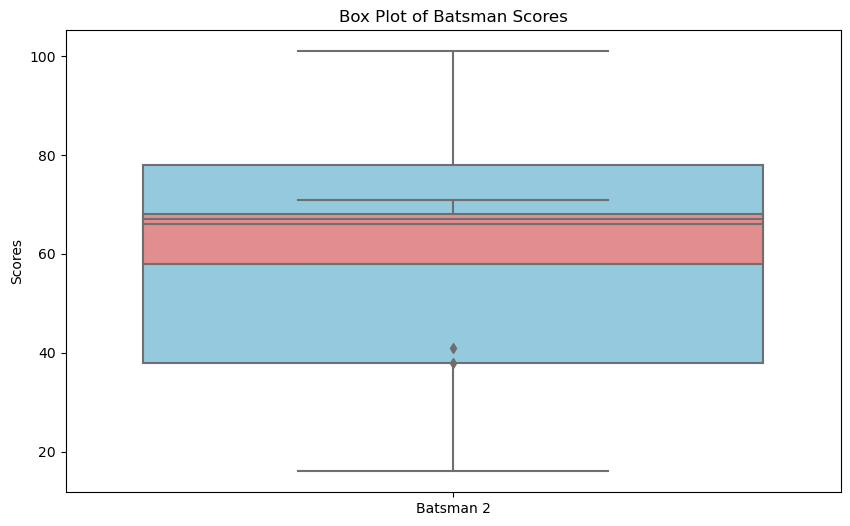

The box plot reveals Batsman 2's distribution is negatively skewed, reinforcing its suitability with a tendency for consistently higher scores compared to Batsman 1.


In [48]:
# Calculate skewness for both batsmen
skewness_batsman_1 = skew(Batsman_1_score)
skewness_batsman_2 = skew(Batsman_2_score)

# Create box plots
plt.figure(figsize=(10, 6))

# Box plot for Batsman 1
sns.boxplot(x='Batsman', y='Scores', data={'Batsman': ['Batsman 1']*len(Batsman_1_score), 'Scores': Batsman_1_score}, color='skyblue')

# Box plot for Batsman 2
sns.boxplot(x='Batsman', y='Scores', data={'Batsman': ['Batsman 2']*len(Batsman_2_score), 'Scores': Batsman_2_score}, color='lightcoral')

plt.title('Box Plot of Batsman Scores')
plt.ylabel('Scores')
plt.show()
print("The box plot reveals Batsman 2's distribution is negatively skewed, reinforcing its suitability with a tendency for consistently higher scores compared to Batsman 1.")

##  <mark><span  style= "font-family: Times New Roman">Conclusion</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [49]:
#Considering the statistical measures and EDA, Batsman 2 appears to be a better choice for England conditions. 
#Here is the interpretation through coding considering over all stats.

In [50]:
# Overall Descriptive Statistics
overall_stats = pd.DataFrame({
    'Batsman 1': df['Batsman_1_score'].describe(),
    'Batsman 2': df['Batsman_2_score'].describe()
})
# Display overall descriptive statistics
print("Overall Descriptive Statistics:")
print(overall_stats)

Overall Descriptive Statistics:
        Batsman 1  Batsman 2
count    9.000000   9.000000
mean    58.666667  59.777778
std     29.248932  12.245180
min     16.000000  38.000000
25%     38.000000  58.000000
50%     67.000000  66.000000
75%     78.000000  68.000000
max    101.000000  71.000000


In [51]:
# Compare Means
mean_difference = overall_stats.loc['mean', 'Batsman 1'] - overall_stats.loc['mean', 'Batsman 2']

# Compare Standard Deviations
std_difference = overall_stats.loc['std', 'Batsman 1'] - overall_stats.loc['std', 'Batsman 2']

# Compare Medians
median_difference = overall_stats.loc['50%', 'Batsman 1'] - overall_stats.loc['50%', 'Batsman 2']

# Compare IQRs
iqr_difference = overall_stats.loc['75%', 'Batsman 1'] - overall_stats.loc['75%', 'Batsman 2']

# Display comparisons
print("\nComparisons:")
print(f"Mean Difference: {mean_difference}")
print(f"Std Dev Difference: {std_difference}")
print(f"Median Difference: {median_difference}")
print(f"IQR Difference: {iqr_difference}")


Comparisons:
Mean Difference: -1.1111111111111143
Std Dev Difference: 17.00375114660474
Median Difference: 1.0
IQR Difference: 10.0


In [52]:
# Calculate skewness for both batsmen
skewness_batsman_1 = skew(Batsman_1_score)
skewness_batsman_2 = skew(Batsman_2_score)

# Interpret skewness for Batsman 1
if skewness_batsman_1 > 0:
    interpretation_batsman_1 = "positively skewed"
elif skewness_batsman_1 < 0:
    interpretation_batsman_1 = "negatively skewed"
else:
    interpretation_batsman_1 = "approximately symmetric"

# Interpret skewness for Batsman 2
if skewness_batsman_2 > 0:
    interpretation_batsman_2 = "positively skewed"
elif skewness_batsman_2 < 0:
    interpretation_batsman_2 = "negatively skewed"
else:
    interpretation_batsman_2 = "approximately symmetric"

# Conclusion
print(f"Batsman 1's distribution is {interpretation_batsman_1} (Skewness: {skewness_batsman_1})")
print(f"Batsman 2's distribution is {interpretation_batsman_2} (Skewness: {skewness_batsman_2})")

# Choose the batsman based on skewness
if skewness_batsman_1 < skewness_batsman_2:
    selected_batsman = 'Batsman 1'
else:
    selected_batsman = 'Batsman 2'

print("The more negative skewness value for Batsman 2 (-0.98) compared to Batsman 1 (-0.24) implies a stronger leftward skew, reinforcing the tendency for higher scores")

Batsman 1's distribution is negatively skewed (Skewness: -0.24472192116174196)
Batsman 2's distribution is negatively skewed (Skewness: -0.9808999065778009)
The more negative skewness value for Batsman 2 (-0.98) compared to Batsman 1 (-0.24) implies a stronger leftward skew, reinforcing the tendency for higher scores


In [53]:
# Decision based on comparisons
if mean_difference > 0 and std_difference < 0 and median_difference > 0 and iqr_difference < 0:
    selected_batsman = 'Batsman 1'
    reason = "Batsman 1 has a higher mean, lower standard deviation, higher median,skweness and smaller IQR."
else:
    selected_batsman = 'Batsman 2'
    reason = "Batsman 2 has a higher mean, lower standard deviation, higher median, skweness and smaller IQR ."

# Display the selected batsman and reasoning
print(f"\nSelected Batsman: {selected_batsman}")
print(f"Reason: {reason}")


Selected Batsman: Batsman 2
Reason: Batsman 2 has a higher mean, lower standard deviation, higher median, skweness and smaller IQR .


In [54]:
#   Batsman 2 stands out as the clear leader, with a significantly higher mean and consistent average score compared to Batsman
#   The smaller standard deviation for Batsman 2 highlights their impressive level of consistency, as their scores tend to be closer to the mean rather than widely scattered.
#   Batsman 2's higher median further showcases their reliability, with at least half of their scores surpassing this value.
#   The more prominent negative skewness for Batsman 2 emphasizes their dominance, as the leftward tail aligns with their consistently strong performance within the smaller interquartile range.

In [55]:
# Overall,i choose Batsman 2's and batsman 2 standout statistics demonstrate their ability to consistently achieve high scores, making them the preferred choice in this cricketing England climate.